## B반 최효진
## KNN 분석

유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)
의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을 구해라. 그리고
실제값과의 정확도와 confusion matrix를 구해라.

데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)

-목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개)

#### 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import confusion_matrix

#### 한글 폰트 적용

In [2]:
matplotlib.rc("font", family="NanumGothic")

#### 데이터 분할하기

In [6]:
df_raw = pd.read_csv("/home/pirl/Downloads/유방암.csv")

df_raw_dummy = pd.get_dummies(df_raw)

df_raw_x = df_raw_dummy.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["diagnosis"] 

df_train_first_x, df_test_first_x, df_train_first_y, df_test_first_y = train_test_split(df_raw_x,  
                                                                df_raw_y, 
                                                                test_size = 0.3, 
                                                                random_state = 1234)  
print("train data X size : {}".format(df_train_first_x.shape))
print("train data Y size : {}".format(df_train_first_y.shape))
print("test data X size : {}".format(df_test_first_x.shape))
print("test data Y size : {}".format(df_test_first_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_first_x,df_train_first_y,test_size=0.4285, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_test_x.shape))
print("validation data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)


#### 결측치 확인

In [20]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

#### train, test 정확도 확인

In [8]:
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(knn_uncusotomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncusotomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.956
Accuracy on test set: 0.918


In [9]:
knn_uncusotomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 모델생성
#### 이웃 수 증가에 따른 정확도 변화

In [10]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.901
1,2,0.965,0.906
2,3,0.960,0.918
3,4,0.952,0.924
4,5,0.956,0.918
5,6,0.943,0.918
6,7,0.960,0.918
7,8,0.952,0.924
8,9,0.952,0.924
9,10,0.943,0.918


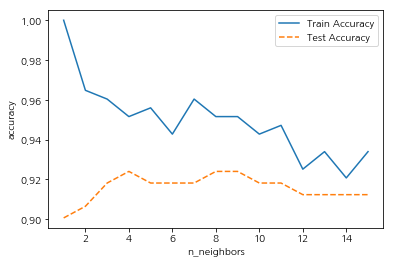

In [11]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

### ==> 군집이 1일때 train의 정확도는 1, 군집이 2일때 train 정확도는 감소한다.
#### 가중치별 이웃 수 증가에 따른 정확도 변화

In [12]:
train_accuracy = [] ; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] * 2

para_weights = (["uniform"]) * 10 + (["distance"] * 10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.901
1,2,uniform,0.965,0.906
2,3,uniform,0.960,0.918
3,4,uniform,0.952,0.924
4,5,uniform,0.956,0.918
5,6,uniform,0.943,0.918
6,7,uniform,0.960,0.918
7,8,uniform,0.952,0.924
8,9,uniform,0.952,0.924
9,10,uniform,0.943,0.918


#### 그림을 그리기 위해 데이터의 형태를 변환

In [13]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                      values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.900585  0.900585
2                   1.0  0.964758     0.900585  0.906433
3                   1.0  0.960352     0.923977  0.918129
4                   1.0  0.951542     0.918129  0.923977
5                   1.0  0.955947     0.912281  0.918129
6                   1.0  0.942731     0.912281  0.918129
7                   1.0  0.960352     0.912281  0.918129
8                   1.0  0.951542     0.918129  0.923977
9                   1.0  0.951542     0.918129  0.923977
10                  1.0  0.942731     0.918129  0.918129

In [14]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.900585,0.900585
2,1.0,0.964758,0.900585,0.906433
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.951542,0.918129,0.923977
5,1.0,0.955947,0.912281,0.918129


#### 가중치별 이웃 수 증가에 따른 정확도 변화

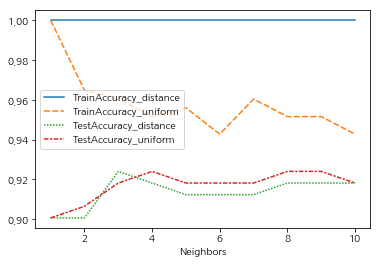

In [15]:
sns.lineplot(data = df_accuracy_weights_pivot)

### ==> 가중치가 distance일 경우 train data의 정확도는 1이다.

#### 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [16]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] * 3
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.901
1,2,minkowski,0.965,0.906
2,3,minkowski,0.960,0.918
3,4,minkowski,0.952,0.924
4,5,minkowski,0.956,0.918
5,6,minkowski,0.943,0.918
6,7,minkowski,0.960,0.918
7,8,minkowski,0.952,0.924
8,9,minkowski,0.952,0.924
9,10,minkowski,0.943,0.918


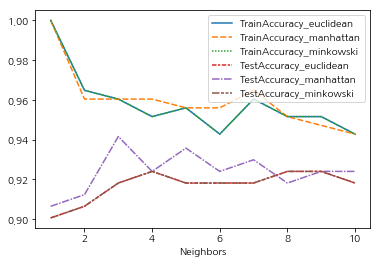

In [17]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

### ==> 거리 계산 방법 별 정확도의 차이가 난다.

### 결론도출
#### train, validation 셋 정확도 확인

In [18]:
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

train data accuracy: 0.952
test data accuracy: 0.924

Confusion matrix: 
[[105   4]
 [  9  53]]


### ==> 예측 정확도 : 0.924
### ==> 이웃 수 : 4
### ==> 가중치 : 균일

#### train, test 셋 정확도 확인

In [19]:
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_test_first_x, df_test_first_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

train data accuracy: 0.952
test data accuracy: 0.936

Confusion matrix: 
[[105   4]
 [  9  53]]


### ==> 예측 정확도 : 0.936
### ==> 이웃 수 : 4
### ==> 가중치 : 균일